In [1]:
import cv2
import imutils
import pytesseract
from matplotlib import pyplot as plt

%matplotlib inline



In [27]:

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
original_image = cv2.imread('car.jpg')



In [72]:
original_image = imutils.resize(original_image, width=500 )
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) 
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17)


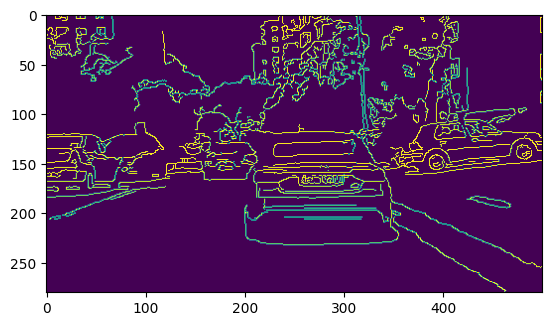

In [77]:
edged_image = cv2.Canny(gray_image, 30, 200)

plt.imshow(edged_image)
plt.show()

In [74]:
contours, new = cv2.findContours(edged_image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = original_image.copy()

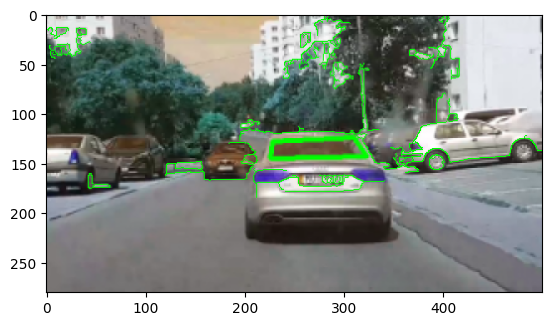

In [80]:
cv2.drawContours(img1, contours, -1, (0, 255, 0), 1)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:30]

# stores the license plate contour
screenCnt = None
img2 = original_image.copy()

# draws top 30 contours
cv2.drawContours(img2, contours, -1, (0, 255, 0), 1)
plt.imshow(img2)
plt.show()

In [1]:
count = 0
idx = 7

for c in contours:
    # approximate the license plate contour
    contour_perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * contour_perimeter, True)

    # Look for contours with 4 corners
    if len(approx) == 4:
        screenCnt = approx

        # find the coordinates of the license plate contour
        x, y, w, h = cv2.boundingRect(c)
        new_img = original_image [ y: y + h, x: x + w]

        # stores the new image
        # cv2.imwrite('./'+str(idx)+'.png',new_img)
        idx += 1
        break

# draws the license plate contour on original image
cv2.drawContours(original_image , [screenCnt], -1, (0, 255, 0), 3)

plt.imshow(original_image)
plt.show()

NameError: name 'contours' is not defined